# Lab 5 : Project Step 1

CHANG Nicolas

**The goal of the project is to predict the number of remaining operational cycles of jet engines before failure 🚀**

## DATASET : FD003

## Loading and coverting .txt files into a dataframe

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# 26 columns total, with standard names for the C-MAPSS dataset
cols = ['unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3']
sensor_cols = [f'sensor_{i:02d}' for i in range(1, 22)] # Sensor_01 to Sensor_21
cols.extend(sensor_cols)

Train and Test dataset were already provided by the NASA

In [72]:
# Define the path to the train file
train_file_path = 'train_FD003.txt'

# Load the data. 'sep'=' ' handles space-separated data, 'header'=None means no header row.
train_df = pd.read_csv(train_file_path, sep=' ', header=None, names=cols, index_col=False)

# Define the path to the test file
test_file_path = 'test_FD003.txt'

# Load the data. 'sep'=' ' handles space-separated data, 'header'=None means no header row.
test_df = pd.read_csv(test_file_path, sep=' ', header=None, names=cols, index_col=False)


C:\Users\cnico\AppData\Local\Temp\ipykernel_31952\1567535777.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_df = pd.read_csv(train_file_path, sep=' ', header=None, names=cols, index_col=False)
C:\Users\cnico\AppData\Local\Temp\ipykernel_31952\1567535777.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  test_df = pd.read_csv(test_file_path, sep=' ', header=None, names=cols, index_col=False)


In [73]:
#Inspect the first few rows
train_df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,21.61,553.97,2387.96,9062.17,1.3,47.30,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,21.61,554.55,2388.00,9061.78,1.3,47.23,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,21.61,554.43,2388.03,9070.23,1.3,47.22,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,21.61,555.21,2388.00,9064.57,1.3,47.24,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,21.61,554.74,2388.04,9076.14,1.3,47.15,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583


In [74]:
#Inspect the first few rows
test_df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,21.58,554.56,2387.93,9048.65,1.3,47.09,521.89,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,21.58,554.10,2387.94,9046.53,1.3,47.08,521.85,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,21.58,554.41,2387.97,9054.92,1.3,47.15,522.10,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,21.59,554.58,2387.94,9055.04,1.3,47.26,522.45,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,21.58,554.16,2388.01,9048.59,1.3,46.94,521.91,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950


It is a **"Run to failure"** dataset type, so we don't have the same amount of informations (line) for each unit (engines)

## 🔎 1. Descriptive Analysis of the data

### Dataset statistics

In [75]:
train_df.shape

(24720, 26)

In [76]:
train_df.dtypes

unit_number         int64
time_in_cycles      int64
op_setting_1      float64
op_setting_2      float64
op_setting_3      float64
sensor_01         float64
sensor_02         float64
sensor_03         float64
sensor_04         float64
sensor_05         float64
sensor_06         float64
sensor_07         float64
sensor_08         float64
sensor_09         float64
sensor_10         float64
sensor_11         float64
sensor_12         float64
sensor_13         float64
sensor_14         float64
sensor_15         float64
sensor_16         float64
sensor_17           int64
sensor_18           int64
sensor_19         float64
sensor_20         float64
sensor_21         float64
dtype: object

In [77]:
train_df['unit_number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

There are 100 different engines studied in this dataset

Lines are the time cycle of the different engines we study  
Columns are:
- unit number (Nominal discrete)
- time cycle (Quantitative discrete)  
- 3 operational settings that have a substantial effect on engine performance (quantitative continous)
- From 01 to 16 and 19 to 21 sensor measurements (quantitative continous)
- Sensors 17 and 18 are integers (quantitative discrete)

In [78]:
train_df.isnull().sum()

unit_number       0
time_in_cycles    0
op_setting_1      0
op_setting_2      0
op_setting_3      0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_15         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
dtype: int64

There is no null elements so the dataset is complete !

In [79]:
pd.set_option('display.max_columns', None)
train_df.describe()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,24720.000000,24720.000000,24720.000000,24720.000000,24720.0,24720.00,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.000000,24720.000000,24720.000000,24720.000000,24720.000000,24720.000000,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.0,24720.0,24720.000000,24720.000000
mean,48.631877,139.077063,-0.000024,0.000005,100.0,518.67,642.457858,1588.079175,1404.471212,1.462000e+01,21.595841,555.143808,2388.071555,9064.110809,1.301232,47.415707,523.050873,2388.071643,8144.202916,8.396176,3.000000e-02,392.566545,2388.0,100.0,38.988552,23.393024
std,29.348985,98.846675,0.002194,0.000294,0.0,0.00,0.523031,6.810418,9.773178,3.552786e-15,0.018116,3.437343,0.158285,19.980294,0.003485,0.300074,3.255314,0.158121,16.504118,0.060512,6.939034e-18,1.761459,0.0,0.0,0.248865,0.149234
min,1.000000,1.000000,-0.008600,-0.000600,100.0,518.67,640.840000,1564.300000,1377.060000,1.462000e+01,21.450000,549.610000,2386.900000,9017.980000,1.290000,46.690000,517.770000,2386.930000,8099.680000,8.156300,3.000000e-02,388.000000,2388.0,100.0,38.170000,22.872600
25%,23.000000,62.000000,-0.001500,-0.000200,100.0,518.67,642.080000,1583.280000,1397.187500,1.462000e+01,21.580000,553.110000,2388.000000,9051.920000,1.300000,47.190000,521.150000,2388.010000,8134.510000,8.360600,3.000000e-02,391.000000,2388.0,100.0,38.830000,23.296200
50%,47.000000,124.000000,-0.000000,-0.000000,100.0,518.67,642.400000,1587.520000,1402.910000,1.462000e+01,21.600000,554.050000,2388.070000,9060.010000,1.300000,47.360000,521.980000,2388.070000,8141.200000,8.398300,3.000000e-02,392.000000,2388.0,100.0,38.990000,23.391600
75%,74.000000,191.000000,0.001500,0.000300,100.0,518.67,642.790000,1592.412500,1410.600000,1.462000e+01,21.610000,556.040000,2388.140000,9070.092500,1.300000,47.600000,523.840000,2388.140000,8149.230000,8.437000,3.000000e-02,394.000000,2388.0,100.0,39.140000,23.483300
max,100.000000,525.000000,0.008600,0.000700,100.0,518.67,645.110000,1615.390000,1441.160000,1.462000e+01,21.610000,570.490000,2388.600000,9234.350000,1.320000,48.440000,537.400000,2388.610000,8290.550000,8.570500,3.000000e-02,399.000000,2388.0,100.0,39.850000,23.950500


`op_setting_3`, `sensor_01`, `sensor_18` and `sensor_19` have a null standard deviation (=0) meaning the features never change so **provide zero predictive information**

Plot the **Standard Deviation** of each feature

Features with exactly ZERO std (not plotted): ['sensor_01', 'op_setting_3', 'sensor_18', 'sensor_19']


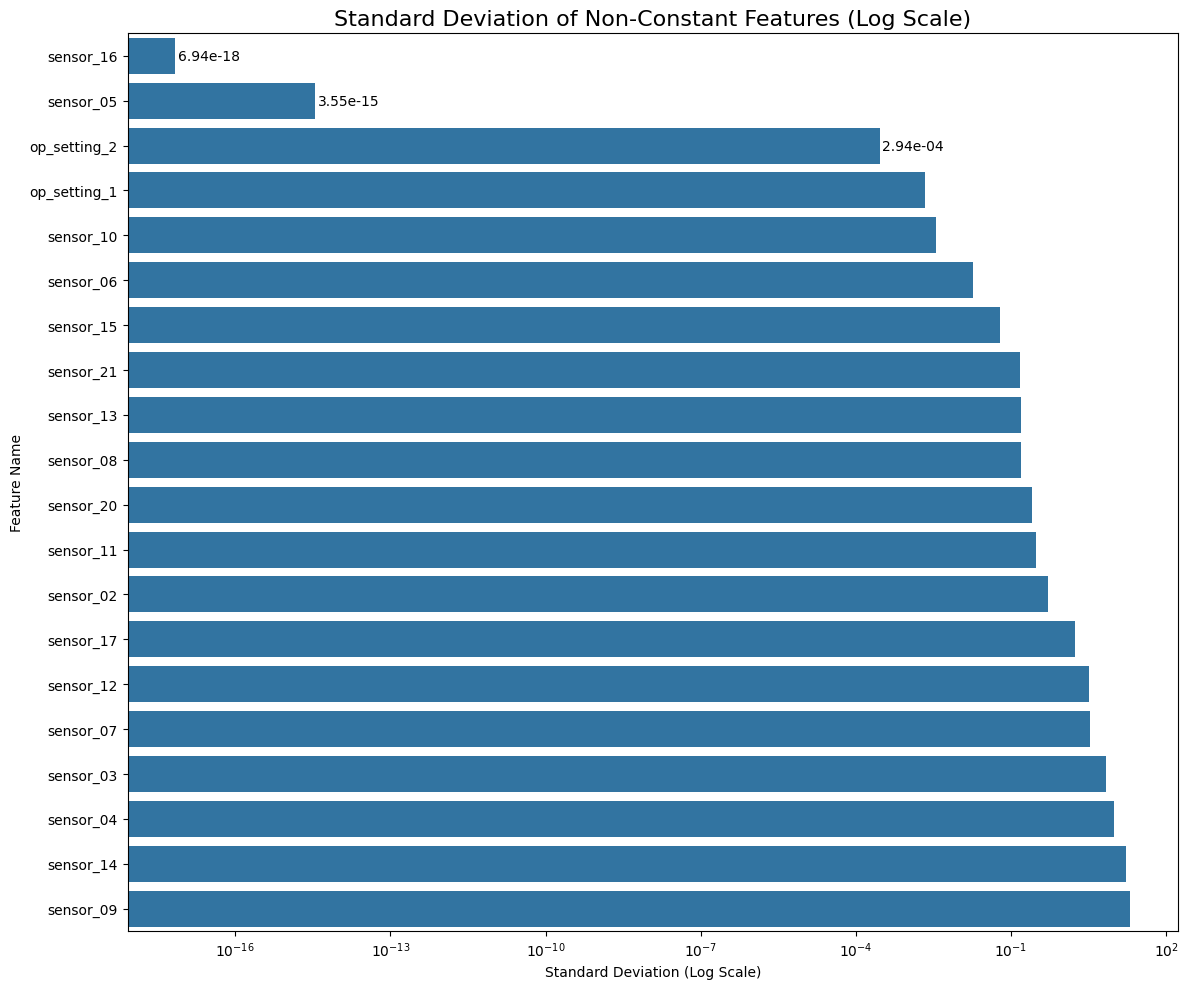

In [80]:
# --- 1. Calculate Standard Deviation ---
std_devs = train_df.std()
feature_std = std_devs.drop(['unit_number', 'time_in_cycles'])
feature_std_sorted = feature_std.sort_values(ascending=True)

# --- 2. (NEW STEP) Filter out the exact zeros ---

# Find and print the features with std = 0
zero_std_cols = feature_std_sorted[feature_std_sorted == 0].index
print(f"Features with exactly ZERO std (not plotted): {list(zero_std_cols)}")

# Create a new Series to plot, containing only values > 0
std_to_plot = feature_std_sorted[feature_std_sorted > 0]

# --- 3. Plotting Code (Now using 'std_to_plot') ---
plt.figure(figsize=(12, 10))

ax = sns.barplot(
    x=std_to_plot.values,  
    y=std_to_plot.index,   
    orient='h'
)

# --- 4. Set Logarithmic Scale (Now it's safe) ---
ax.set_xscale('log')

plt.title('Standard Deviation of Non-Constant Features (Log Scale)', fontsize=16)
plt.xlabel('Standard Deviation (Log Scale)')
plt.ylabel('Feature Name')

# --- 5. Add text labels (Iterate over 'std_to_plot') ---
for i, (p, v) in enumerate(zip(ax.patches, std_to_plot)): 
    if v < 0.001:
        ax.text(p.get_width() * 1.1,  
                p.get_y() + p.get_height() / 2,
                f'{v:.2e}', 
                ha='left', 
                va='center')

plt.tight_layout()
plt.show()

`sensor_16` and `sensor_05` have a really small std (<1e-5) so they'll also provide zero predictive information

Change `ENGINE_ID_TO_PLOT` parameter in [1,10] to study a particular engine

### Plot the sensors data evolution over time cycles

In [81]:
ENGINE_ID_TO_PLOT = 7 #CHANGE HERE

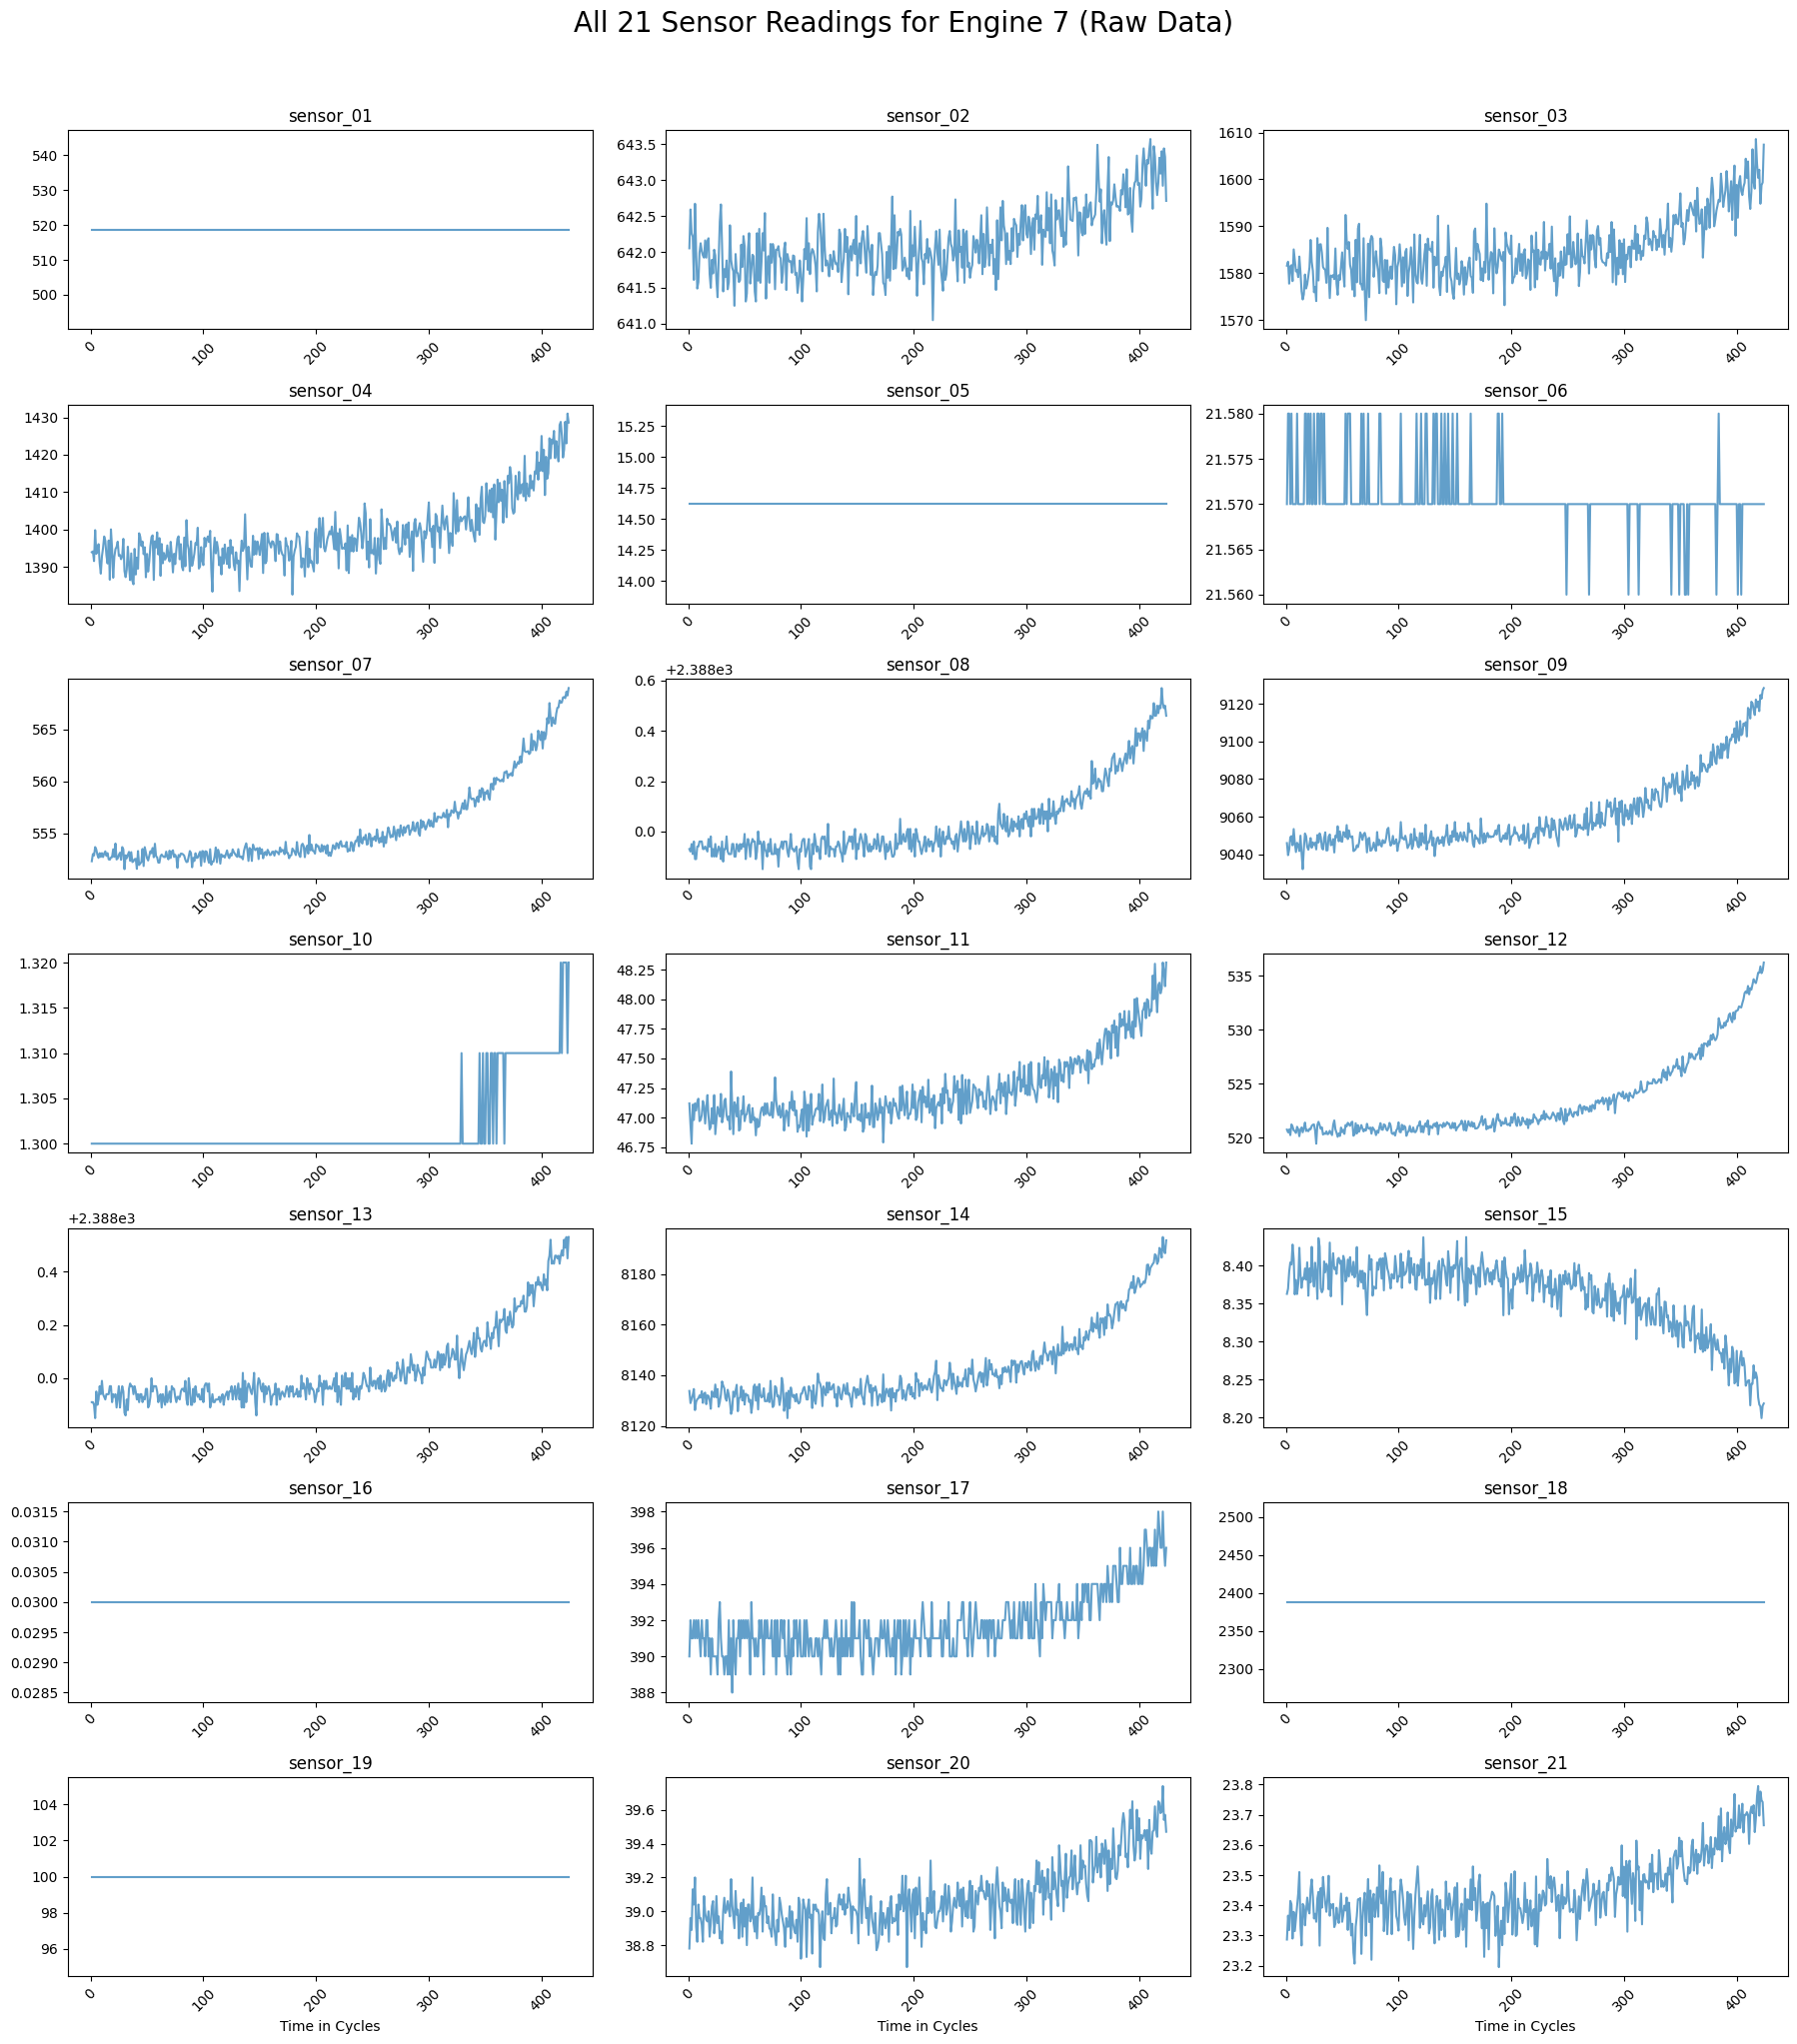

In [82]:
# Filter the data for the selected engine
engine_data = train_df[train_df['unit_number'] == ENGINE_ID_TO_PLOT]

# --- 3. Plotting Subplots (7 rows x 3 columns = 21 sensors) ---
N_ROWS = 7
N_COLS = 3

fig, axes = plt.subplots(N_ROWS, N_COLS, figsize=(18, 20))
fig.suptitle(f'All 21 Sensor Readings for Engine {ENGINE_ID_TO_PLOT} (Raw Data)', fontsize=20, y=1.02)

# Flatten the axes array for easy iteration (important for the 7x3 grid)
axes = axes.flatten()

# Loop through all 21 sensor columns
for i, sensor in enumerate(sensor_cols):
    ax = axes[i]
    
    # Plot the sensor data
    ax.plot(engine_data['time_in_cycles'], engine_data[sensor], 
            linewidth=1.5, color='tab:blue', alpha=0.7)
    
    # Set title and labels
    ax.set_title(sensor, fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    
    # Only show X-axis label on the bottom row plots
    if i >= (N_ROWS - 1) * N_COLS:
        ax.set_xlabel('Time in Cycles')

# Remove any unused subplots (if your data had slightly fewer than 21)
# (Not strictly necessary here, but good practice)
for j in range(len(sensor_cols), N_ROWS * N_COLS):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**The data looks contaminated with sensor noise**

## 🧹 2. Implementation of the necessary pre-processing

### a) Delete useless features

In [83]:
#Columns with low std (=useless for prediction)
list_to_drop = ['op_setting_3','sensor_01', 'sensor_05', 'sensor_16', 'sensor_18', 'sensor_19']

train_df = train_df.drop(columns=list_to_drop)
test_df = test_df.drop(columns=list_to_drop)

### b) Feature engineering

#### Calculcating Reamining Useful Life (RUL)

We arbitrarily capped the RUL to a max (125) :
- RUL > 125 : "Healthy phase"
- RUL <= 125 : "Degradation phase"

In [84]:
# Get the maximum cycle for each engine (Total Lifespan)
max_cycles = train_df.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycles = max_cycles.rename(columns={'time_in_cycles': 'max_time_in_cycles'})

# Merge the max_cycles back into the training data
train_df = train_df.merge(max_cycles, on='unit_number', how='left')

# Calculate the RUL for every row
train_df['RUL'] = train_df['max_time_in_cycles'] - train_df['time_in_cycles']

# Drop the temporary max_time_in_cycles column
train_df = train_df.drop(columns=['max_time_in_cycles'])

# --- 2. Apply Piecewise Capping to RUL ---
# This is a standard practice for this dataset
RUL_CAP = 125
train_df['RUL_capped'] = train_df['RUL'].clip(upper=RUL_CAP)

# Drop the original 'RUL' column, as 'RUL_capped' is our new target
train_df = train_df.drop(columns=['RUL'])

print("RUL Engineered and Capped on train_df.")
train_df.head()

RUL Engineered and Capped on train_df.


,unit_number,time_in_cycles,op_setting_1,op_setting_2,sensor_02,sensor_03,sensor_04,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL_capped
0,1,1,-0.0005,0.0004,642.36,1583.23,1396.84,21.61,553.97,2387.96,9062.17,1.3,47.30,522.31,2388.01,8145.32,8.4246,391,39.11,23.3537,125
1,1,2,0.0008,-0.0003,642.50,1584.69,1396.89,21.61,554.55,2388.00,9061.78,1.3,47.23,522.42,2388.03,8152.85,8.4403,392,38.99,23.4491,125
2,1,3,-0.0014,-0.0002,642.18,1582.35,1405.61,21.61,554.43,2388.03,9070.23,1.3,47.22,522.03,2388.00,8150.17,8.3901,391,38.85,23.3669,125
3,1,4,-0.0020,0.0001,642.92,1585.61,1392.27,21.61,555.21,2388.00,9064.57,1.3,47.24,522.49,2388.08,8146.56,8.3878,392,38.96,23.2951,125
4,1,5,0.0016,0.0000,641.68,1588.63,1397.65,21.61,554.74,2388.04,9076.14,1.3,47.15,522.58,2388.03,8147.80,8.3869,392,39.14,23.4583,125


### c) Scaling datas

In [85]:
from sklearn.preprocessing import StandardScaler

# --- 1. Identify Feature Columns ---
# Get all columns that are NOT ID, time, or the target variable.
features_cols = [col for col in train_df.columns if col not in ['unit_number', 'time_in_cycles', 'RUL_capped']]

# --- 2. Initialize and FIT Scaler on Training Data ---
# We create the scaler object
scaler = StandardScaler()

# We FIT the scaler ONLY on the training data.
# This learns the mean and std of train_df.
# Then we TRANSFORM train_df.
print("Fitting scaler on training data and transforming train_df...")
train_df[features_cols] = scaler.fit_transform(train_df[features_cols])

# --- 3. TRANSFORM Test Data ---
# We use the SAME scaler (fitted on train data) to transform test_df.
# We ONLY call .transform(), we DO NOT .fit() again.
print("Transforming test_df using the same scaler...")
test_df[features_cols] = scaler.transform(test_df[features_cols])

# --- 4. Verify the Result ---
print("\n--- Scaling Complete ---")
print("Training Data (scaled sample):")
train_df[features_cols].head()

Fitting scaler on training data and transforming train_df...
Transforming test_df using the same scaler...

--- Scaling Complete ---
Training Data (scaled sample):


,op_setting_1,op_setting_2,sensor_02,sensor_03,sensor_04,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,-0.217122,1.343135,-0.187102,-0.712038,-0.780848,0.781589,-0.341494,-0.704785,-0.097138,-0.353479,-0.385602,-0.227593,-0.389857,0.067687,0.469741,-0.889364,0.488019,-0.263512
1,0.375538,-1.037519,0.080574,-0.497656,-0.775732,0.781589,-0.172755,-0.452071,-0.116658,-0.353479,-0.618882,-0.193802,-0.263369,0.523946,0.729201,-0.321641,0.005819,0.375767
2,-0.627426,-0.697425,-0.531256,-0.841254,0.116524,0.781589,-0.207667,-0.262536,0.306267,-0.353479,-0.652208,-0.313608,-0.453101,0.361559,-0.100409,-0.889364,-0.556747,-0.175058
3,-0.900961,0.322855,0.883602,-0.362566,-1.248464,0.781589,0.019257,-0.452071,0.022983,-0.353479,-0.585556,-0.172298,0.052852,0.142821,-0.138419,-0.321641,-0.114730,-0.656192
4,0.740252,-0.017239,-1.487242,0.080881,-0.697966,0.781589,-0.117479,-0.199357,0.602065,-0.353479,-0.885488,-0.144650,-0.263369,0.217955,-0.153292,-0.321641,0.608569,0.437416


In [86]:
train_df.describe()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,sensor_02,sensor_03,sensor_04,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL_capped
count,24720.000000,24720.000000,2.472000e+04,2.472000e+04,2.472000e+04,2.472000e+04,2.472000e+04,2.472000e+04,2.472000e+04,2.472000e+04,2.472000e+04,2.472000e+04,2.472000e+04,2.472000e+04,2.472000e+04,2.472000e+04,2.472000e+04,2.472000e+04,2.472000e+04,2.472000e+04,24720.000000
mean,48.631877,139.077063,-3.564211e-17,-6.898473e-18,1.606884e-14,-1.091338e-14,-2.131168e-14,8.258852e-14,-1.241265e-14,1.219169e-12,-1.188377e-14,-8.341864e-14,3.035328e-15,-1.792683e-14,2.101206e-13,-9.429753e-14,-5.146261e-15,-1.451439e-14,-1.299442e-14,-2.874364e-14,93.143204
std,29.348985,98.846675,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,40.627125
min,1.000000,1.000000,-3.909851e+00,-2.057798e+00,-3.093297e+00,-3.491659e+00,-2.804796e+00,-8.050561e+00,-1.609941e+00,-7.401705e+00,-2.308862e+00,-3.223102e+00,-2.418473e+00,-1.622264e+00,-7.220222e+00,-2.697740e+00,-3.964208e+00,-2.592532e+00,-3.289210e+00,-3.487378e+00,0.000000
25%,23.000000,62.000000,-6.730148e-01,-6.974252e-01,-7.224535e-01,-7.046957e-01,-7.452908e-01,-8.744392e-01,-5.916922e-01,-4.520712e-01,-6.101540e-01,-3.534790e-01,-7.521850e-01,-5.839409e-01,-3.898570e-01,-5.873148e-01,-5.879285e-01,-8.893636e-01,-6.371132e-01,-6.488209e-01,61.000000
50%,47.000000,124.000000,1.082376e-02,-1.723855e-02,-1.106228e-01,-8.210751e-02,-1.597478e-01,2.295796e-01,-3.182196e-01,-9.821801e-03,-2.052468e-01,-3.534790e-01,-1.856469e-01,-3.289680e-01,-1.039230e-02,-1.819532e-01,3.510497e-02,-3.216407e-01,5.819425e-03,-9.542517e-03,123.000000
75%,74.000000,191.000000,6.946623e-01,1.003041e+00,6.350458e-01,6.362917e-01,6.271155e-01,7.815890e-01,2.607276e-01,4.324276e-01,2.993856e-01,-3.534790e-01,6.141715e-01,2.424170e-01,4.323165e-01,3.046019e-01,6.746646e-01,8.138050e-01,6.085688e-01,6.049420e-01,125.000000
max,100.000000,525.000000,3.931498e+00,2.363415e+00,5.070818e+00,4.010235e+00,3.754104e+00,7.815890e-01,4.464641e+00,3.338638e+00,8.520527e+00,5.385767e+00,3.413536e+00,4.407998e+00,3.404790e+00,8.867487e+00,2.880897e+00,3.652419e+00,3.461582e+00,3.735664e+00,125.000000


In [87]:
print("\nTest Data (scaled sample):")
test_df[features_cols].head()


Test Data (scaled sample):


,op_setting_1,op_setting_2,sensor_02,sensor_03,sensor_04,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,-0.764193,-1.377612,-0.990129,-0.902925,-0.771639,-0.874439,-0.169846,-0.894321,-0.773819,-0.353479,-1.085443,-0.356616,-0.832566,-0.649725,-0.333427,-0.889364,0.327286,0.360354
1,0.284359,-0.697425,-0.837172,-0.472693,-0.570063,-0.874439,-0.303673,-0.831142,-0.879925,-0.353479,-1.118768,-0.368904,-0.389857,-0.409780,0.165661,-0.889364,0.206736,0.587519
2,0.649073,-1.037519,-1.487242,-0.924951,-1.284277,-0.874439,-0.213485,-0.641607,-0.460003,-0.353479,-0.885488,-0.292104,-0.832566,-0.360700,-0.675517,-0.889364,0.447836,0.210251
3,1.241733,0.322855,-0.493017,-0.521150,-0.934332,-0.322430,-0.164028,-0.831142,-0.453997,-0.353479,-0.518905,-0.184586,-0.706078,-0.432199,-0.417710,-0.321641,-0.074547,0.570767
4,-0.034765,0.322855,0.004095,0.139616,-0.881124,-0.874439,-0.286218,-0.388893,-0.776822,-0.353479,-1.585329,-0.350472,-0.642833,-0.606098,0.304480,-0.889364,0.407652,0.013241


### d) Reducing data sensor noise

In [88]:
# 1. Define the smoothing factor
ALPHA = 0.1  # A good starting point (range 0-1, lower is smoother)

# 2. Loop over all your feature columns
for col in features_cols:
    
    # Apply EWMA to the training set
    # We must use groupby('unit_number') so the average doesn't cross between engines
    train_df[col] = train_df.groupby('unit_number')[col].transform(lambda x: x.ewm(alpha=ALPHA).mean())
    
    # Apply the SAME EWMA to the test set
    test_df[col] = test_df.groupby('unit_number')[col].transform(lambda x: x.ewm(alpha=ALPHA).mean())

print("EWMA smoothing applied to all features.")
train_df[features_cols].head()

EWMA smoothing applied to all features.


,op_setting_1,op_setting_2,sensor_02,sensor_03,sensor_04,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,-0.217122,1.343135,-0.187102,-0.712038,-0.780848,0.781589,-0.341494,-0.704785,-0.097138,-0.353479,-0.385602,-0.227593,-0.389857,0.067687,0.469741,-0.889364,0.488019,-0.263512
1,0.094804,0.090159,-0.046220,-0.599205,-0.778155,0.781589,-0.252684,-0.571778,-0.107412,-0.353479,-0.508381,-0.209808,-0.323284,0.307823,0.606299,-0.590562,0.234230,0.072951
2,-0.171701,-0.200462,-0.225200,-0.688522,-0.448015,0.781589,-0.236073,-0.457666,0.045238,-0.353479,-0.561453,-0.248111,-0.371187,0.327652,0.345521,-0.700821,-0.057643,-0.018565
3,-0.383757,-0.048291,0.097220,-0.593740,-0.680771,0.781589,-0.161827,-0.456039,0.038766,-0.353479,-0.568462,-0.226066,-0.247884,0.273906,0.204800,-0.590562,-0.074243,-0.203976
4,-0.109281,-0.040708,-0.289697,-0.429001,-0.684970,0.781589,-0.150998,-0.393359,0.176321,-0.353479,-0.645878,-0.206185,-0.251665,0.260243,0.117356,-0.524893,0.092495,-0.047352


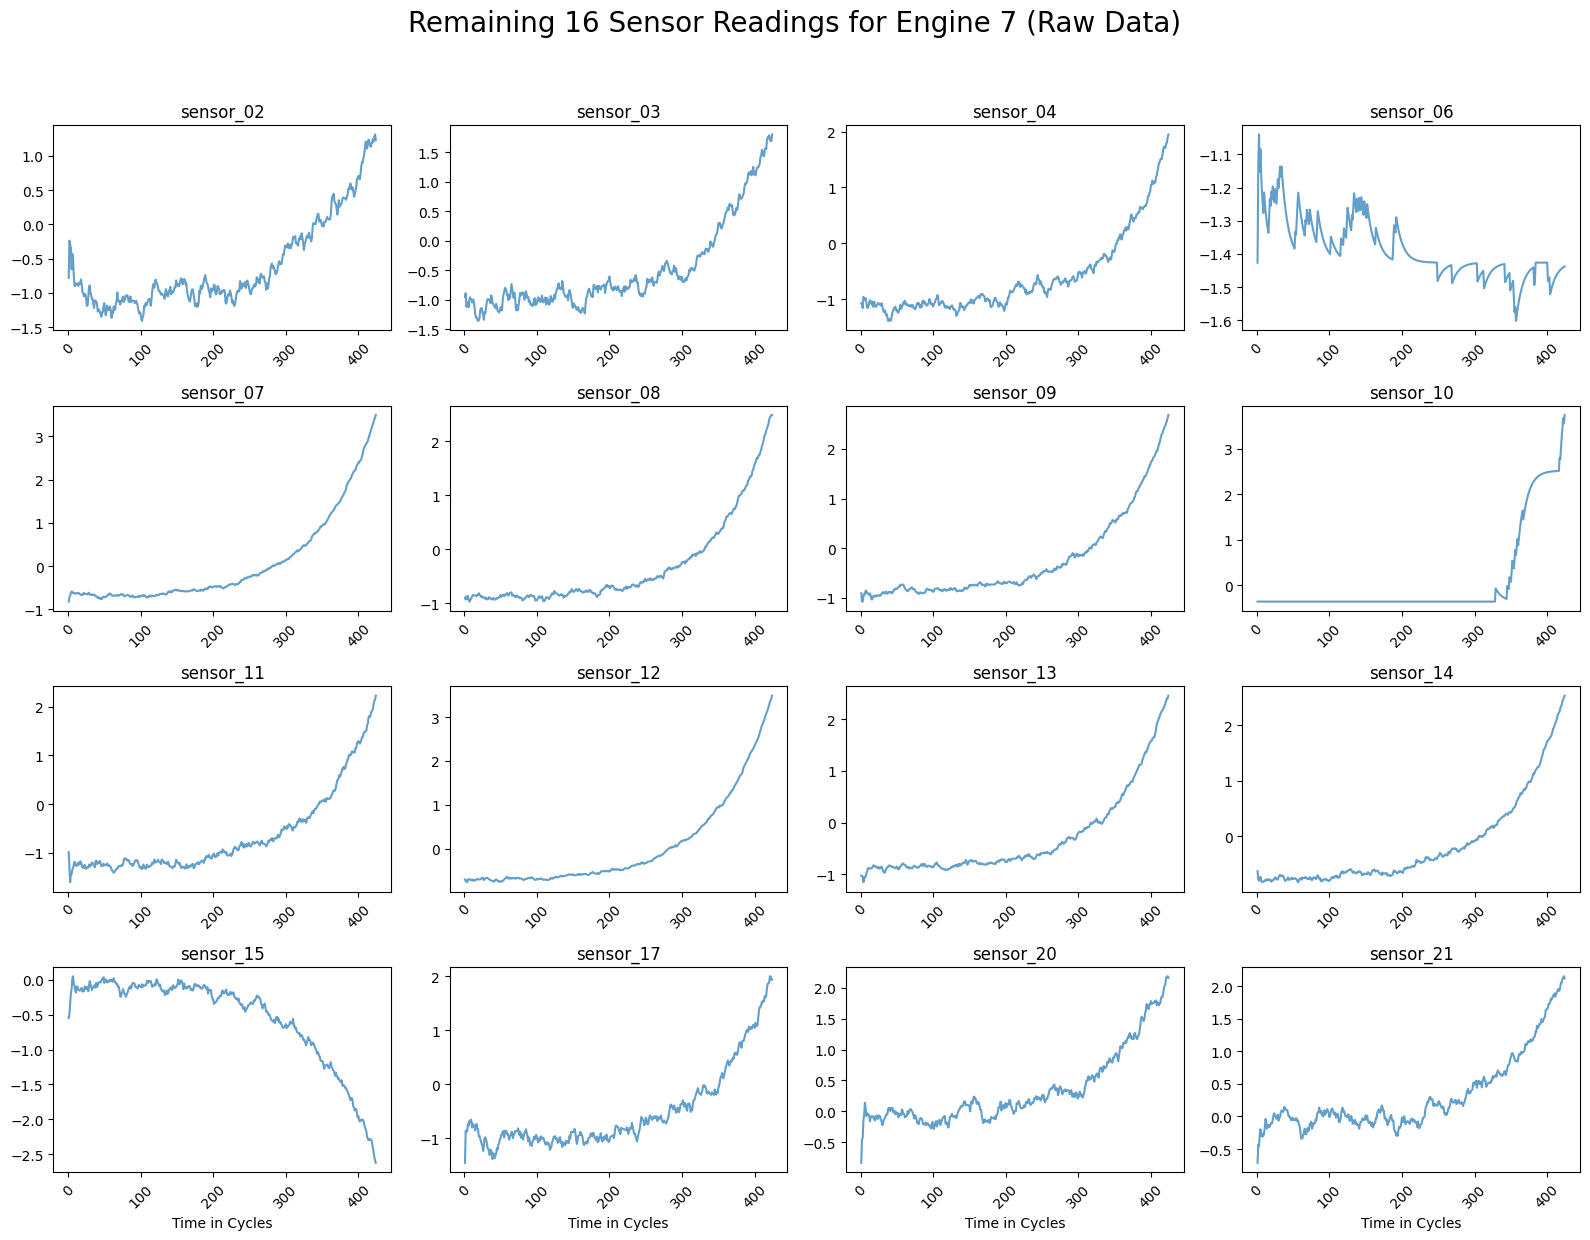

In [89]:
# --- 1. Identify all remaining sensor columns ---
# This dynamically finds all columns in your df that start with 'sensor_'
sensor_cols_remaining = sorted([col for col in train_df.columns if col.startswith('sensor_')])
num_sensors = len(sensor_cols_remaining)

# --- 2. Configuration for Plotting ---
ENGINE_ID_TO_PLOT = 7
engine_data = train_df[train_df['unit_number'] == ENGINE_ID_TO_PLOT]

# --- 3. Plotting Subplots (Adjusted to 4x4 grid) ---
N_ROWS = 4
N_COLS = 4

fig, axes = plt.subplots(N_ROWS, N_COLS, figsize=(16, 12))
fig.suptitle(f'Remaining {num_sensors} Sensor Readings for Engine {ENGINE_ID_TO_PLOT} (Raw Data)', fontsize=20, y=1.03)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the REMAINING sensor columns
for i, sensor in enumerate(sensor_cols_remaining):
    ax = axes[i]
    
    # Plot the sensor data
    ax.plot(engine_data['time_in_cycles'], engine_data[sensor], 
            linewidth=1.5, color='tab:blue', alpha=0.7)
    
    # Set title and labels
    ax.set_title(sensor, fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    
    # Only show X-axis label on the bottom row plots
    if i >= (N_ROWS - 1) * N_COLS:
        ax.set_xlabel('Time in Cycles')

# Remove any unused subplots (if your grid is larger than num_sensors)
for j in range(num_sensors, N_ROWS * N_COLS):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can see that the noise has been greatly attenuated ! LET'S GOOO

## 📄 3. Formalisation of the problem

### a) The objective

The high-level objective is to perform **Prognostics and Health Management (PHM)**. The specific goal here is to predict the **Remaining Useful Life (RUL)** of a jet engine, measured in operational cycles, given its operational settings and sensor history.

### b) The problem type

This is a **supervised**, multivariate, time-series regression problem.
- Supervised : we have "labeled" training data (`train_FD003.txt`) where we can calculate the true RUL for every cycle
- Multivariate : we are using multiple input features at each time step
- Time-series : the data is a sequence and the order of cycles matters. the prediction at any given time t depends on the data from previous time
- Regression : The outpout we are predicting is a continous numerical value (that we'll round as an integer because it's a time cycle)

## ✅ 4. Selection of a baseline model and implementation of the model

We concluded **Random Forest Regressor** would be the best baseline model.  
**Why a Random Forest?**
- It's a baseline : Simple, fast and easy to interpret
- It's Non-Linear : it's a powerful model that can find complex, non-linear patterns in sensor datas, which a simple Linear Regression model would miss
- It's 2D (simple) : This is the most important reason. A Random Forest can be trained directly on the 2D pre-processed data.

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# --- 1. Define your Features (X) and Target (y) ---

features_cols = [col for col in train_df.columns if col not in ['unit_number', 'time_in_cycles', 'RUL_capped']]
target = 'RUL_capped'

# --- 2. Create a Time-Series Split (No Shuffling!) ---
# This creates our "practice quiz" (validation set) from the main training data
val_split_unit = 80  # Engines 1-80 (train), 81-100 (val)

# Training split
X_train_split = train_df[train_df['unit_number'] <= val_split_unit][features_cols]
y_train_split = train_df[train_df['unit_number'] <= val_split_unit][target]

# Validation split
X_val_split = train_df[train_df['unit_number'] > val_split_unit][features_cols]
y_val_split = train_df[train_df['unit_number'] > val_split_unit][target]

# --- Debugging Check ---
print(f"Using {len(features_cols)} features (scaled, not smoothed).")
print(f"X_train_split shape: {X_train_split.shape}")
print(f"y_train_split shape: {y_train_split.shape}")
print(f"X_val_split shape: {X_val_split.shape}")
print(f"y_val_split shape: {y_val_split.shape}")

# --- 3. Initialize and Train the Baseline Model ---
if X_train_split.empty or y_train_split.empty:
    print("\n--- ERROR ---")
    print("Training data is EMPTY. The 'train_df' or 'features_cols' variables are not correctly defined.")
    print("Please re-run your full pre-processing script from the beginning.")
    print("---------------")
else:
    print("\nTraining Random Forest baseline...")
    baseline_model = RandomForestRegressor(
        n_estimators=100,  # 100 trees is a good, fast default
        random_state=42,   # For reproducible results
        n_jobs=-1          # Use all available CPU cores
    )
    
    # Train the model
    baseline_model.fit(X_train_split, y_train_split)
    print("Baseline model trained.")

    # --- 4. Evaluate the Baseline ---
    print("\nEvaluating baseline model...")
    # Predict on the validation data
    y_pred = baseline_model.predict(X_val_split)
    
    # Calculate the Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_val_split, y_pred))

    print("---" * 10)
    print(f"Baseline Model Validation RMSE: {rmse:.4f}")
    print("---" * 10)

Using 18 features (scaled, not smoothed).
X_train_split shape: (19779, 18)
y_train_split shape: (19779,)
X_val_split shape: (4941, 18)
y_val_split shape: (4941,)

Training Random Forest baseline...
Baseline model trained.

Evaluating baseline model...
------------------------------
Baseline Model Validation RMSE: 18.7536
------------------------------


In [26]:
y_val_split

19779    125
19780    125
19781    125
19782    125
19783    125
        ... 
24715      4
24716      3
24717      2
24718      1
24719      0
Name: RUL_capped, Length: 4941, dtype: int64

In [27]:
y_pred

array([ 90.23, 117.28, 119.96, ...,   3.14,   3.03,   3.39], shape=(4941,))